# Starting with defense
We really need four models. A model to predict fantasy points for quarterbacks, running backs, pass catchers (wide receivers and tight ends, or maybe WRs and TEs separately) and team defense.<br>

In theory, defense should be the easiest model, because it's the position that requires the least attention when building lineups. Find the cheapest defense you can tolerate, then spend your time, salary and computational power on the other positions.<br>

So hopefully we can build a defense model relatively quickly. It should also give us a chance to dip our toe a little deeper into the vast ocean of data in the [nfl_data_py](https://github.com/nflverse/nfl_data_py) package, which was cloned from [nflfastr](https://www.nflfastr.com/articles/beginners_guide.html).<br>

The goal of this notebook is to derive the target variable so that we have the FanDuel and DraftKings points scored by every defense in every game since 2000.<br>

## FanDuel and DraftKings scoring

The first thing we'll do is show scoring systems for defense on the two major DFS sites. The scoring system is exactly the same.

In [286]:
##Defensive fantasy points for FanDuel and DraftKings
# Sacks = 1
# Opponent-fumbles recovered = 2
# Return touchdowns = 6
# Extra Point Return = 2
# Safeties = 2
# Blocked Punt/Kick = 2
# Interceptions made = 2
# 0 points allowed = 10
# 1-6 points allowed = 7
# 7-13 points allowed = 4
# 14-20 points allowed = 1
# 21-27 points allowed = 0
# 28-34 points allowed = -1
# 35+ points allowed = -4

In [299]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nfl_data_py as nfl

In [300]:
#nfl.see_weekly_cols()

In [301]:
#weekly = nfl.import_weekly_data([2023], ['player_name', 'player_display_name', 'fantasy_points', 'fantasy_points_ppr'])

In [302]:
#weekly.head()

In [303]:
#seasons = list(np.arange(2000, 2024, 1))

In [304]:
#nfl_pbp = nfl.import_pbp_data(seasons)

This is the list of columns we extracted from the nfl play-by-play data

In [305]:
defense_cols = ['play_id', 'game_id', 'old_game_id', 'home_team', 'away_team', 'season_type', 'week', 'posteam', 'posteam_type', 'defteam',\
'sp', 'play_type', 'field_goal_result', 'extra_point_result', 'two_point_conv_result', 'td_team', 'punt_blocked', 'interception',\
'fumble_forced', 'fumble_not_forced', 'safety', 'fumble_lost', 'own_kickoff_recovery', 'own_kickoff_recovery_td', 'sack', 'touchdown',\
                'pass_touchdown', 'rush_touchdown', 'return_touchdown', 'extra_point_attempt',\
'two_point_attempt', 'field_goal_attempt', 'kickoff_attempt', 'punt_attempt', 'fumble', 'forced_fumble_player_1_team', 'forced_fumble_player_2_team',\
'fumbled_1_team', 'fumbled_2_team', 'fumble_recovery_1_team', 'fumble_recovery_2_team', 'return_team', 'defensive_two_point_attempt',\
'defensive_two_point_conv', 'defensive_extra_point_attempt', 'defensive_extra_point_conv', 'season', 'drive_ended_with_score', 'away_score',\
'home_score', 'location', 'result', 'total', 'spread_line', 'total_line', 'div_game', 'roof', 'surface', 'pass', 'rush',\
                'posteam_score', 'posteam_score_post', 'defteam_score', 'defteam_score_post', 'desc']	

# Defensive data
We extracted all the play_by_play data from the nfl_data_py package, then filtered by all the columns above for our defense model. We've also created an sqlite database to store the data. Previously, we had stored the data in CSVs, but those files were too big to push to our GitHub repo.

In [306]:
#defense_df = nfl_pbp[defense_cols]

In [307]:
#defense_df.info()

In [308]:
#defense_df.to_csv('defense_df.csv')

In [309]:
#defense_df = pd.read_csv('defense_df.csv')

In [310]:
import sqlite3

In [311]:
# # Connect to the SQLite database
# conn = sqlite3.connect('nfl_dfs.db')

# # Create a cursor object to execute SQL commands
# cursor = conn.cursor()

# # List all tables in the database
# cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
# tables = cursor.fetchall()
# print("Tables in the database:")
# for table in tables:
#     print(table[0])

# # Check if the 'team_defense' table exists
# table_name = 'team_defense'
# if (table_name,) in tables:
#     print(f"\nTable '{table_name}' exists. Retrieving the first 5 rows:")
#     cursor.execute(f"SELECT * FROM {table_name} LIMIT 5;")
#     rows = cursor.fetchall()
#     for row in rows:
#         print(row)
# else:
#     print(f"\nTable '{table_name}' does not exist.")

# # Close the connection
# conn.close()


In [312]:
# #defense_df = pd.read_csv('defense_df.csv')

# # Add a primary key column
# defense_df.reset_index(inplace=True)
# defense_df.rename(columns={'index': 'id'}, inplace=True)

# # Connect to SQLite database (creates the database if it doesn't exist)
# conn = sqlite3.connect('nfl_dfs.db')
# cursor = conn.cursor()

# # Define the SQL schema with a primary key
# create_table_query = '''
# CREATE TABLE IF NOT EXISTS team_defense (
#     id INTEGER PRIMARY KEY,
#     play_id FLOAT,
#     game_id TEXT,
#     old_game_id TEXT,
#     home_team TEXT,
#     away_team TEXT,
#     season_type TEXT,
#     week INTEGER,
#     posteam TEXT,
#     posteam_type TEXT,
#     defteam TEXT,
#     sp FLOAT,
#     play_type TEXT,
#     field_goal_result TEXT,
#     extra_point_result TEXT,
#     two_point_conv_result TEXT,
#     td_team TEXT,
#     punt_blocked FLOAT,
#     interception FLOAT,
#     fumble_forced FLOAT,
#     fumble_not_forced FLOAT,
#     safety FLOAT,
#     fumble_lost FLOAT,
#     own_kickoff_recovery FLOAT,
#     own_kickoff_recovery_td FLOAT,
#     sack FLOAT,
#     touchdown FLOAT,
#     pass_touchdown FLOAT,
#     rush_touchdown FLOAT,
#     return_touchdown FLOAT,
#     extra_point_attempt FLOAT,
#     two_point_attempt FLOAT,
#     field_goal_attempt FLOAT,
#     kickoff_attempt FLOAT,
#     punt_attempt FLOAT,
#     fumble FLOAT,
#     forced_fumble_player_1_team TEXT,
#     forced_fumble_player_2_team TEXT,
#     fumbled_1_team TEXT,
#     fumbled_2_team TEXT,
#     fumble_recovery_1_team TEXT,
#     fumble_recovery_2_team TEXT,
#     return_team TEXT,
#     defensive_two_point_attempt FLOAT,
#     defensive_two_point_conv FLOAT,
#     defensive_extra_point_attempt FLOAT,
#     defensive_extra_point_conv FLOAT,
#     season INTEGER,
#     drive_ended_with_score FLOAT,
#     away_score INTEGER,
#     home_score INTEGER,
#     location TEXT,
#     result INTEGER,
#     total INTEGER,
#     spread_line FLOAT,
#     total_line FLOAT,
#     div_game INTEGER,
#     roof TEXT,
#     surface TEXT,
#     pass FLOAT,
#     rush FLOAT,
#     posteam_score FLOAT,
#     defteam_score FLOAT,
#     posteam_score_post FLOAT,
#     defteam_score_post FLOAT,
#     desc TEXT
# )
# '''

# # Create the table
# cursor.execute(create_table_query)

# # Load DataFrame into SQLite
# defense_df.to_sql('team_defense', conn, if_exists='replace', index=False)

# # Verify data was loaded
# cursor.execute('SELECT * FROM team_defense LIMIT 5')
# rows = cursor.fetchall()
# for row in rows:
#     print(row)

# # Close the connection
# conn.close()





# Our first database query
We've commented out the code that only needed to run once. Now we run the code below to get the dataframe we need to run this notebook.

In [313]:
# Connect to the SQLite database
conn = sqlite3.connect('nfl_dfs.db')

# Query specific columns from the table
query = "SELECT * FROM team_defense"
defense_df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Display the DataFrame
print(defense_df.head())  # Display the first few rows of the DataFrame

   id  Unnamed: 0  play_id          game_id  old_game_id home_team away_team  \
0   0           0     34.0  2000_01_ARI_NYG   2000090300       NYG       ARI   
1   1           1     70.0  2000_01_ARI_NYG   2000090300       NYG       ARI   
2   2           2    106.0  2000_01_ARI_NYG   2000090300       NYG       ARI   
3   3           3    131.0  2000_01_ARI_NYG   2000090300       NYG       ARI   
4   4           4    148.0  2000_01_ARI_NYG   2000090300       NYG       ARI   

  season_type  week posteam  ... div_game      roof  surface pass rush  \
0         REG     1     ARI  ...        1  outdoors    grass  0.0  0.0   
1         REG     1     ARI  ...        1  outdoors    grass  0.0  0.0   
2         REG     1     ARI  ...        1  outdoors    grass  0.0  1.0   
3         REG     1     ARI  ...        1  outdoors    grass  1.0  0.0   
4         REG     1     ARI  ...        1  outdoors    grass  1.0  0.0   

  posteam_score posteam_score_post defteam_score  defteam_score_post  \
0 

In [314]:
defense_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1135207 entries, 0 to 1135206
Data columns (total 67 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   id                             1135207 non-null  int64  
 1   Unnamed: 0                     1135207 non-null  int64  
 2   play_id                        1135207 non-null  float64
 3   game_id                        1135207 non-null  object 
 4   old_game_id                    1135207 non-null  int64  
 5   home_team                      1135207 non-null  object 
 6   away_team                      1135207 non-null  object 
 7   season_type                    1135207 non-null  object 
 8   week                           1135207 non-null  int64  
 9   posteam                        1071824 non-null  object 
 10  posteam_type                   1071888 non-null  object 
 11  defteam                        1071888 non-null  object 
 12  sp            

# Functions
We're going to do a lot of grouping of dataframes, and these two functions will be useful. The first one can be used when we're aggregating multiple columns. The second one can be used when we just aggregate a single column.<br>

The third function basically expands our base dataframe every time we aggregate a new column.<br>

First, we'll create three lists that will be used as arguments to the functions, and below the functions is the aggregration dictionary that will be used as an argument the first time we use the group_cols function.

In [315]:
cols_to_group_defteam = ['season', 'week', 'game_id', 'defteam'] #defteam is the last item in the list
cols_to_group_tdteam = ['season', 'week', 'game_id', 'td_team'] #td team is the last item in the list
cols_to_group_posteam = ['season', 'week', 'game_id', 'posteam'] #posteam is the last item in the list

In [316]:
def group_cols(df, cols, agg_dict):
    """
    Function that groups columns with an aggregation dictionary
    """
    group_df = df.groupby(cols).agg(agg_dict).reset_index()
    return group_df

In [317]:
def group_cols_count(df, cols, output_col_name='count'):
    """
    Function that groups columns and counts the occurrences, outputting one column with a custom name.
    """
    group_df = df.groupby(cols).size().reset_index(name=output_col_name)
    return group_df

In [318]:
def expand_base_df(left, right, list):
    """
    This function merges our existing dataframe with a new one that essentially adds a column to it. It then fills the null values with 0.
    """
    base_df = pd.merge(left, right, on = list, how = 'left')
    base_df = base_df.fillna(0)
    return base_df

In [319]:
ints_sacks_agg = {'interception': 'sum', 'sack': 'sum', 'safety': 'sum'}

# Creating base dataframe
We'll start by grouping the defense dataframe so that there's an observation for every team in every game. The defteam variable gives us the plays in which that team was on defense. We'll group here for interception, sack and safety totals in each game for every team. Then we'll join the subsequent dataframes we create to this one.

In [320]:
base_df = group_cols(defense_df, cols_to_group_defteam, ints_sacks_agg)

In [321]:
base_df.head()

,season,week,game_id,defteam,interception,sack,safety
0,2000,1,2000_01_ARI_NYG,ARI,1.0,0.0,0.0
1,2000,1,2000_01_ARI_NYG,NYG,3.0,1.0,0.0
2,2000,1,2000_01_BAL_PIT,BAL,0.0,1.0,0.0
3,2000,1,2000_01_BAL_PIT,PIT,0.0,1.0,0.0
4,2000,1,2000_01_CAR_WAS,CAR,0.0,0.0,0.0


In [322]:
base_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12890 entries, 0 to 12889
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   season        12890 non-null  int64  
 1   week          12890 non-null  int64  
 2   game_id       12890 non-null  object 
 3   defteam       12890 non-null  object 
 4   interception  12890 non-null  float64
 5   sack          12890 non-null  float64
 6   safety        12890 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 705.0+ KB


# Return touchdowns
There are lots of ways return touchdowns can be scored: interceptions, fumble recoveries, kickoffs, punts, blocked punts or field goals. We were going to filter for all of them individually, but since all of them are worth six points for a fantasy defense, we'll just filter for all return touchdowns. There are some cases where a kickoff was fumbled, recovered by the kicking team and returned for a touchdown. Something like this could be counted twice if we filtered for kickoff returns and fumble returns individually.

In [323]:
return_tds = defense_df[(defense_df['return_touchdown'] == 1)]

In [324]:
return_tds = group_cols_count(return_tds, cols_to_group_tdteam, 'return_tds')

In [325]:
return_tds.head()

,season,week,game_id,td_team,return_tds
0,2000,1,2000_01_CAR_WAS,CAR,1
1,2000,1,2000_01_DEN_STL,DEN,1
2,2000,1,2000_01_DEN_STL,LA,1
3,2000,1,2000_01_DET_NO,DET,1
4,2000,1,2000_01_DET_NO,NO,1


In [326]:
return_tds['return_tds'].value_counts()

return_tds
1    1907
2     213
3      25
4       1
Name: count, dtype: int64

In [327]:
return_tds.sort_values(by = 'return_tds', ascending = False)

,season,week,game_id,td_team,return_tds
1284,2012,17,2012_17_JAX_TEN,TEN,4
569,2005,13,2005_13_SEA_PHI,SEA,3
276,2002,14,2002_14_STL_KC,KC,3
663,2006,15,2006_15_JAX_TEN,TEN,3
1245,2012,11,2012_11_IND_NE,NE,3
...,...,...,...,...,...
744,2007,9,2007_09_WAS_NYJ,NYJ,1
743,2007,9,2007_09_SEA_CLE,SEA,1
742,2007,9,2007_09_JAX_NO,NO,1
741,2007,9,2007_09_JAX_NO,JAX,1


Once in a while, we'll need to change the column name from td_team or posteam to defteam, which is the column name we'll use in our final dataframe. 

In [328]:
return_tds.rename(columns = {'td_team': 'defteam'}, inplace = True)

In [329]:
base_df = expand_base_df(base_df, return_tds, cols_to_group_defteam)

In [330]:
base_df.head()

,season,week,game_id,defteam,interception,sack,safety,return_tds
0,2000,1,2000_01_ARI_NYG,ARI,1.0,0.0,0.0,0.0
1,2000,1,2000_01_ARI_NYG,NYG,3.0,1.0,0.0,0.0
2,2000,1,2000_01_BAL_PIT,BAL,0.0,1.0,0.0,0.0
3,2000,1,2000_01_BAL_PIT,PIT,0.0,1.0,0.0,0.0
4,2000,1,2000_01_CAR_WAS,CAR,0.0,0.0,0.0,1.0


# Fumble recoveries

First we have to filter for defensive fumble recoveries on non-punts, because it seems that when a team punts, it's still considered the offensive team. So if the team receiving the punt loses a fumble, it's not credited to the defense. Teams kicking off are considered the defensive team. On non-punt plays, if defteam matches fumble_recovery_1_team or fumble_recovery_2_team, it should count as a fumble recovery for the defense.

In [331]:
fumble_df = defense_df[defense_df['fumble_lost'] == True]

In [332]:
fumble_no_punt = defense_df[(defense_df['fumble_lost'] == True) & (defense_df['punt_attempt'] == False)]

In [333]:
fumble_no_punt = fumble_no_punt[(fumble_no_punt['defteam'] == fumble_no_punt['fumble_recovery_1_team']) | (fumble_no_punt['defteam'] == fumble_no_punt['fumble_recovery_2_team'])]

In [334]:
fumble_recoveries = group_cols_count(fumble_no_punt, cols_to_group_defteam, 'fumble_recoveries')

In [335]:
fumble_recoveries.head()

,season,week,game_id,defteam,fumble_recoveries
0,2000,1,2000_01_ARI_NYG,ARI,1
1,2000,1,2000_01_ARI_NYG,NYG,1
2,2000,1,2000_01_BAL_PIT,BAL,1
3,2000,1,2000_01_CAR_WAS,WAS,1
4,2000,1,2000_01_CHI_MIN,MIN,1


In [336]:
base_df = expand_base_df(base_df, fumble_recoveries, cols_to_group_defteam)

Apparently, DraftKings awards a fumble recovery to a defense if the offensive team recovers a defensive fumble after fumbling a ball away to the defense. So we'll create a column for that.

In [337]:
fumble_rec_dk = fumble_no_punt[fumble_no_punt['posteam'] == fumble_no_punt['fumble_recovery_2_team']]

In [338]:
fumble_rec_dk = group_cols_count(fumble_rec_dk, cols_to_group_posteam, 'off_fum_rec_dk')

In [339]:
fumble_rec_dk.rename(columns = {'posteam': 'defteam'}, inplace = True)

In [340]:
base_df = expand_base_df(base_df, fumble_rec_dk, cols_to_group_defteam)

# Fumble recoveries on punts
Since a punting team is still considered the team with possession of the ball (posteam), if the team receiving the punt loses the ball on a fumble, we need to ensure that the fantasy defense is credited with a fumble recovery.

In [341]:
fumble_punt = defense_df[(defense_df['fumble_lost'] == True) & (defense_df['punt_attempt'] == True)]

In [342]:
fumble_punt = fumble_punt[(fumble_punt['posteam'] == fumble_punt['fumble_recovery_1_team'])\
| (fumble_punt['posteam'] == fumble_punt['fumble_recovery_2_team'])]

In [343]:
fumble_punt = group_cols_count(fumble_punt, cols_to_group_posteam, 'punt_fum_rec')

In [344]:
fumble_punt.rename(columns = {'posteam': 'defteam'}, inplace = True)

In [345]:
base_df = expand_base_df(base_df, fumble_punt, cols_to_group_defteam)

In [346]:
base_df.head()

,season,week,game_id,defteam,interception,sack,safety,return_tds,fumble_recoveries,off_fum_rec_dk,punt_fum_rec
0,2000,1,2000_01_ARI_NYG,ARI,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2000,1,2000_01_ARI_NYG,NYG,3.0,1.0,0.0,0.0,1.0,0.0,0.0
2,2000,1,2000_01_BAL_PIT,BAL,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,2000,1,2000_01_BAL_PIT,PIT,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2000,1,2000_01_CAR_WAS,CAR,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Blocked punts, field goals and extra points

In [347]:
blocked_punts = defense_df[defense_df['punt_blocked'] == True]

In [348]:
blocked_punts = group_cols_count(blocked_punts, cols_to_group_defteam, 'blocked_punts')

In [349]:
blocked_punts.head()

,season,week,game_id,defteam,blocked_punts
0,2000,3,2000_03_ATL_CAR,ATL,1
1,2000,3,2000_03_DEN_OAK,LV,1
2,2000,3,2000_03_TB_DET,TB,1
3,2000,5,2000_05_PIT_JAX,JAX,1
4,2000,6,2000_06_OAK_SF,LV,1


In [350]:
base_df = expand_base_df(base_df, blocked_punts, cols_to_group_defteam)

In [351]:
base_df.head()

,season,week,game_id,defteam,interception,sack,safety,return_tds,fumble_recoveries,off_fum_rec_dk,punt_fum_rec,blocked_punts
0,2000,1,2000_01_ARI_NYG,ARI,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2000,1,2000_01_ARI_NYG,NYG,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2000,1,2000_01_BAL_PIT,BAL,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2000,1,2000_01_BAL_PIT,PIT,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2000,1,2000_01_CAR_WAS,CAR,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [352]:
blocked_FGs = defense_df[(defense_df['field_goal_attempt'] == True) & (defense_df['field_goal_result'] == 'blocked')]

In [353]:
blocked_FGs = group_cols_count(blocked_FGs, cols_to_group_defteam, 'blocked_FG')

In [354]:
base_df = expand_base_df(base_df, blocked_FGs, cols_to_group_defteam)

In [355]:
blocked_XPs = defense_df[(defense_df['extra_point_attempt'] == True) & (defense_df['extra_point_result'] == 'blocked')]

In [356]:
blocked_XPs = group_cols_count(blocked_XPs, cols_to_group_defteam, 'blocked_XP')

In [357]:
base_df = expand_base_df(base_df, blocked_XPs, cols_to_group_defteam)

In [358]:
base_df.head()

,season,week,game_id,defteam,interception,sack,safety,return_tds,fumble_recoveries,off_fum_rec_dk,punt_fum_rec,blocked_punts,blocked_FG,blocked_XP
0,2000,1,2000_01_ARI_NYG,ARI,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2000,1,2000_01_ARI_NYG,NYG,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2000,1,2000_01_BAL_PIT,BAL,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2000,1,2000_01_BAL_PIT,PIT,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2000,1,2000_01_CAR_WAS,CAR,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# Defensive 2-point conversion returns
We've only had 12 of these since 2000.

In [359]:
conv_returns = defense_df[(defense_df['defensive_two_point_conv'] == True)\
| (defense_df['defensive_extra_point_conv'] == True)].reset_index()

In [360]:
conv_returns = conv_returns[['season', 'week', 'game_id', 'defteam', 'defensive_two_point_conv', 'defensive_extra_point_conv']]

In [361]:
#No need to group here. These all happened in different games

In [362]:
base_df = expand_base_df(base_df, conv_returns, cols_to_group_defteam)

In [363]:
base_df.head()

,season,week,game_id,defteam,interception,sack,safety,return_tds,fumble_recoveries,off_fum_rec_dk,punt_fum_rec,blocked_punts,blocked_FG,blocked_XP,defensive_two_point_conv,defensive_extra_point_conv
0,2000,1,2000_01_ARI_NYG,ARI,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2000,1,2000_01_ARI_NYG,NYG,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2000,1,2000_01_BAL_PIT,BAL,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2000,1,2000_01_BAL_PIT,PIT,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2000,1,2000_01_CAR_WAS,CAR,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [364]:
#Next: Points Allowed!

# Final scores
We'll create a dataframe with the final scores for each home team and away team for every game, and we'll also indicate the home and away team.

In [365]:
final_scores = defense_df.groupby(['season', 'week', 'game_id']).agg({'away_score': 'max', 'home_score': 'max'}).reset_index()

In [366]:
final_scores.head()

,season,week,game_id,away_score,home_score
0,2000,1,2000_01_ARI_NYG,16,21
1,2000,1,2000_01_BAL_PIT,16,0
2,2000,1,2000_01_CAR_WAS,17,20
3,2000,1,2000_01_CHI_MIN,27,30
4,2000,1,2000_01_DEN_STL,36,41


In [367]:
home_away_df = defense_df[['season', 'week', 'game_id', 'away_team', 'home_team']]

In [368]:
final_scores = pd.merge(final_scores, home_away_df, on = ['season', 'week', 'game_id'], how = 'left')

In [369]:
final_scores = final_scores.drop_duplicates()

In [370]:
final_scores.head()

,season,week,game_id,away_score,home_score,away_team,home_team
0,2000,1,2000_01_ARI_NYG,16,21,ARI,NYG
182,2000,1,2000_01_BAL_PIT,16,0,BAL,PIT
355,2000,1,2000_01_CAR_WAS,17,20,CAR,WAS
520,2000,1,2000_01_CHI_MIN,27,30,CHI,MIN
695,2000,1,2000_01_DEN_STL,36,41,DEN,LA


# Scoring change dataframe
Filtering each row of the play-by-play data for each scoring change in which the score changes for the team on defense, and then we'll filter the same thing for offense. Then we'll concatenate into one dataframe and sort by the index so all the plays are in sequence.

In [371]:
def_score_changes = defense_df[defense_df['defteam_score'] < defense_df['defteam_score_post']]

In [372]:
off_score_changes = defense_df[defense_df['posteam_score'] < defense_df['posteam_score_post']]

In [373]:
all_score_changes = pd.concat([def_score_changes, off_score_changes])

In [374]:
all_score_changes = all_score_changes.sort_index()

In [375]:
#all_score_changes = all_score_changes.sort_values(by = ['season', 'week', 'game_id', 'away_score', 'home_score'])

In [376]:
all_score_changes['has_ball'] = np.where(all_score_changes['away_team'] == all_score_changes['posteam'], 'away', 'home')

In [377]:
len(all_score_changes)

82459

# Functions to create columns indicating scores against a fantasy defense
We need to account for touchdowns, field goals, extra points and 2-point conversions.

In [378]:
def score_vs_def_col(diff, poss):
    """
    This function creates columns that indicate whether a touchdown or field goal was scored 
    against a fantasy defense on that particular play. The diff argument is the scoring difference, three or six points.
    The poss is the team that has the ball.
    """
    new_column = np.where(((all_score_changes['posteam_score_post'] - all_score_changes['posteam_score']) == diff)\
                          & (all_score_changes['has_ball'] == poss), 1, 0)
    return new_column

In [379]:
def punt_td_vs_def(poss):
    """
    This function creates columns to indicate whether a punt was returned for a touchdown. Even though the defensive unit isn't on the field,
    this still should count as points against a fantasy defense. We need to write this function separately because the data indicates
    the defensive team as the scoring team when punts are returned for touchdowns.
    """
    new_column = np.where(((all_score_changes['defteam_score_post'] - all_score_changes['defteam_score']) == 6)\
                          & (all_score_changes['punt_attempt'] == True) & (all_score_changes['has_ball'] != poss), 1, 0)
    return new_column

In [380]:
all_score_changes['td_vs_H'] = score_vs_def_col(6, 'away')

In [381]:
all_score_changes['fg_vs_H'] = score_vs_def_col(3, 'away')

In [382]:
all_score_changes['td_vs_A'] = score_vs_def_col(6, 'home')

In [383]:
all_score_changes['fg_vs_A'] = score_vs_def_col(3, 'home')

In [384]:
all_score_changes['punt_TD_vs_H'] = punt_td_vs_def('away')

In [385]:
all_score_changes['punt_TD_vs_A'] = punt_td_vs_def('home')

In [386]:
def xp_vs_def_col(poss):
    """
    This function rounds up all the successful extra points that count against a fantasy defense.
    It checks that the possession team's score has increased by one and also checks that the possession team's score
    increased by six in the previous row. Otherwise, it was a defensive touchdown and the XP wouldn't be charged to the fantasy defense.
    """
    new_column = np.where(((all_score_changes['posteam_score_post'] - all_score_changes['posteam_score']) == 1)\
    & ((all_score_changes['posteam_score_post'].shift(1) - all_score_changes['posteam_score'].shift(1)) == 6)\
                          & ((all_score_changes['has_ball'] == poss)), 1, 0)  
    return new_column

In [387]:
def xp2_vs_def_col(poss):
    """
    This function rounds up all the successful 2-point conversions that count against a fantasy defense.
    It checks that the possession team's score has increased by two and also checks that the possession team's score
    increased by six in the previous row. Otherwise, it was a defensive touchdown and the XP wouldn't be charged to the fantasy defense.
    """
    new_column = np.where(((all_score_changes['posteam_score_post'] - all_score_changes['posteam_score']) == 2)\
    & ((all_score_changes['posteam_score_post'].shift(1) - all_score_changes['posteam_score'].shift(1)) == 6)\
                          & (all_score_changes['has_ball'] == poss), 1, 0)  
    return new_column

In [388]:
def xp_after_punt(poss):
    """
    This function creates a column to indicate successful extra points after a punt is returned for a touchdown. This time,
    it checks that the defensive team's score increases by six in the previous row and also that the play was a punt attempt.
    """
    new_column = np.where(((all_score_changes['posteam_score_post'] - all_score_changes['posteam_score']) == 1)\
                          & ((all_score_changes['defteam_score_post'].shift(1) - all_score_changes['defteam_score'].shift(1)) == 6)\
                          & (all_score_changes['punt_attempt'].shift(1) == True)\
                          & (all_score_changes['has_ball'] == poss), 1, 0)  
    return new_column

In [389]:
def xp2_after_punt(poss):
    """
    This function creates a column to indicate successful 2-point conversions after a punt is returned for a touchdown. This time,
    it checks that the defensive team's score increases by six in the previous row and also that the play was a punt attempt.
    """
    new_column = np.where(((all_score_changes['posteam_score_post'] - all_score_changes['posteam_score']) == 2)\
                          & ((all_score_changes['defteam_score_post'].shift(1) - all_score_changes['defteam_score'].shift(1)) == 6)\
                          & (all_score_changes['punt_attempt'].shift(1) == True)\
                          & (all_score_changes['has_ball'] == poss), 1, 0)  
    return new_column

In [390]:
all_score_changes['xp_vs_H'] = xp_vs_def_col('away')

In [391]:
all_score_changes['xp_vs_A'] = xp_vs_def_col('home')

In [392]:
all_score_changes['xp2_vs_H'] = xp2_vs_def_col('away')

In [393]:
all_score_changes['xp2_vs_A'] = xp2_vs_def_col('home')

In [394]:
all_score_changes['xp_after_punt_vs_H'] = xp_after_punt('away')

In [395]:
all_score_changes['xp_after_punt_vs_A'] = xp_after_punt('home')

In [396]:
all_score_changes['xp2_after_punt_vs_H'] = xp2_after_punt('away')

In [397]:
all_score_changes['xp2_after_punt_vs_A'] = xp2_after_punt('home')

In [398]:
len(all_score_changes)

82459

In [399]:
all_score_changes = all_score_changes[['season', 'week', 'game_id', 'away_team', 'home_team', 'td_vs_H', 'td_vs_A',\
                                      'fg_vs_H', 'fg_vs_A', 'punt_TD_vs_H', 'punt_TD_vs_A', 'xp_vs_H', 'xp_vs_A',\
                                      'xp2_vs_H', 'xp2_vs_A', 'xp_after_punt_vs_H', 'xp_after_punt_vs_A',\
                                      'xp2_after_punt_vs_H', 'xp2_after_punt_vs_A']]

In [400]:
all_score_changes = all_score_changes.groupby(['season', 'week', 'game_id', 'away_team', 'home_team']).sum().reset_index()

In [401]:
len(all_score_changes)

6445

# Combine columns function
We'll need to consolidate some of the columns, so that touchdowns on non-punts and touchdowns on punts are in the same column.

In [402]:
def combine_cols(df, new_col_name, *args):
    """
    We can consolidate a lot of the columns in the all_score_changes dataframes as well as the base_df.
    For example, td_vs_A and punt_td_vs_A can be added together into one column.
    This function will sum the column values and then drop the columns we don't need
    """
    df[new_col_name] = df[list(args)].sum(axis = 1)
    df.drop(columns = list(args), inplace = True)
    return df

In [403]:
all_score_changes.head()

,season,week,game_id,away_team,home_team,td_vs_H,td_vs_A,fg_vs_H,fg_vs_A,punt_TD_vs_H,punt_TD_vs_A,xp_vs_H,xp_vs_A,xp2_vs_H,xp2_vs_A,xp_after_punt_vs_H,xp_after_punt_vs_A,xp2_after_punt_vs_H,xp2_after_punt_vs_A
0,2000,1,2000_01_ARI_NYG,ARI,NYG,2,3,1,0,0,0,1,3,0,0,0,0,0,0
1,2000,1,2000_01_BAL_PIT,BAL,PIT,1,0,3,0,0,0,1,0,0,0,0,0,0,0
2,2000,1,2000_01_CAR_WAS,CAR,WAS,2,2,1,2,0,0,2,2,0,0,0,0,0,0
3,2000,1,2000_01_CHI_MIN,CHI,MIN,3,3,2,3,0,0,3,3,0,0,0,0,0,0
4,2000,1,2000_01_DEN_STL,DEN,LA,3,5,3,0,0,1,3,4,0,0,0,1,0,0


In [404]:
all_score_changes = combine_cols(all_score_changes, 'TD_vs_H', 'td_vs_H', 'punt_TD_vs_H')

In [405]:
all_score_changes = combine_cols(all_score_changes, 'TD_vs_A', 'td_vs_A', 'punt_TD_vs_A')

In [406]:
all_score_changes = combine_cols(all_score_changes, 'XP_vs_H', 'xp_vs_H', 'xp_after_punt_vs_H')

In [407]:
all_score_changes = combine_cols(all_score_changes, 'XP_vs_A', 'xp_vs_A', 'xp_after_punt_vs_A')

In [408]:
all_score_changes = combine_cols(all_score_changes, 'XP2_vs_H', 'xp2_vs_H', 'xp2_after_punt_vs_H')

In [409]:
all_score_changes = combine_cols(all_score_changes, 'XP2_vs_A', 'xp2_vs_A', 'xp2_after_punt_vs_A')

In [410]:
all_score_changes.head()

,season,week,game_id,away_team,home_team,fg_vs_H,fg_vs_A,TD_vs_H,TD_vs_A,XP_vs_H,XP_vs_A,XP2_vs_H,XP2_vs_A
0,2000,1,2000_01_ARI_NYG,ARI,NYG,1,0,2,3,1,3,0,0
1,2000,1,2000_01_BAL_PIT,BAL,PIT,3,0,1,0,1,0,0,0
2,2000,1,2000_01_CAR_WAS,CAR,WAS,1,2,2,2,2,2,0,0
3,2000,1,2000_01_CHI_MIN,CHI,MIN,2,3,3,3,3,3,0,0
4,2000,1,2000_01_DEN_STL,DEN,LA,3,0,3,6,3,5,0,0


# Getting one row for each team in each game
We currently have one row for each game, with points against home teams and away teams in separate columns. Now we'll turn this into a dataframe with two rows for each game, one for the home team and one for the away team.<br>

Then we'll multiply the values by the appropriate points, and use np.select to convert the raw point total into the corresponding fantasy points.

In [411]:
all_score_changes_away = all_score_changes.copy()
all_score_changes_home = all_score_changes.copy()

In [412]:
# Assign new column 'def_team' and keep only necessary columns for each new row
all_score_changes_away['defteam'] = all_score_changes_away['away_team']
all_score_changes_away = all_score_changes_away[['season', 'week', 'game_id', 'defteam', 'fg_vs_A', 'TD_vs_A', 'XP_vs_A', 'XP2_vs_A']]
all_score_changes_away.columns = ['season', 'week', 'game_id', 'defteam', 'FG_allowed', 'TD_allowed', 'XP_allowed', 'XP2_allowed']

all_score_changes_home['defteam'] = all_score_changes_home['home_team']
all_score_changes_home = all_score_changes_home[['season', 'week', 'game_id', 'defteam', 'fg_vs_H', 'TD_vs_H', 'XP_vs_H', 'XP2_vs_H']]
all_score_changes_home.columns = ['season', 'week', 'game_id', 'defteam', 'FG_allowed', 'TD_allowed', 'XP_allowed', 'XP2_allowed']

In [413]:
# Concatenate the rows back together
scoring_vs_def = pd.concat([all_score_changes_away, all_score_changes_home])

In [414]:
# Sort by season, week, and game_id to maintain the original order
scoring_vs_def = scoring_vs_def.sort_values(by=['season', 'week', 'game_id']).reset_index(drop=True)

In [415]:
scoring_vs_def['TD_allowed'] = scoring_vs_def['TD_allowed'] * 6
scoring_vs_def['FG_allowed'] = scoring_vs_def['FG_allowed'] * 3
scoring_vs_def['XP2_allowed'] = scoring_vs_def['XP2_allowed'] * 2

In [416]:
scoring_vs_def['points_against'] = scoring_vs_def['TD_allowed'] + scoring_vs_def['FG_allowed'] + scoring_vs_def['XP_allowed'] + scoring_vs_def['XP2_allowed']

In [417]:
scoring_vs_def.drop(columns = ['TD_allowed', 'FG_allowed', 'XP2_allowed', 'XP_allowed'], inplace = True)

In [418]:
conditions = [
    (scoring_vs_def['points_against'] == 0),
    (scoring_vs_def['points_against'] >= 1) & (scoring_vs_def['points_against'] <= 6),
    (scoring_vs_def['points_against'] >= 7) & (scoring_vs_def['points_against'] <= 13),
    (scoring_vs_def['points_against'] >= 14) & (scoring_vs_def['points_against'] <= 20),
    (scoring_vs_def['points_against'] >= 21) & (scoring_vs_def['points_against'] <= 27),
    (scoring_vs_def['points_against'] >= 28) & (scoring_vs_def['points_against'] <= 34),
    (scoring_vs_def['points_against'] >= 35)
]

# Define corresponding values
values = [10, 7, 4, 1, 0, -1, -4]

# Apply np.select to create the new column with updated values
scoring_vs_def['points_against'] = np.select(conditions, values)

In [419]:
scoring_vs_def.head()

,season,week,game_id,defteam,points_against
0,2000,1,2000_01_ARI_NYG,ARI,0
1,2000,1,2000_01_ARI_NYG,NYG,1
2,2000,1,2000_01_BAL_PIT,BAL,10
3,2000,1,2000_01_BAL_PIT,PIT,1
4,2000,1,2000_01_CAR_WAS,CAR,1


In [420]:
base_df.head()

,season,week,game_id,defteam,interception,sack,safety,return_tds,fumble_recoveries,off_fum_rec_dk,punt_fum_rec,blocked_punts,blocked_FG,blocked_XP,defensive_two_point_conv,defensive_extra_point_conv
0,2000,1,2000_01_ARI_NYG,ARI,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2000,1,2000_01_ARI_NYG,NYG,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2000,1,2000_01_BAL_PIT,BAL,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2000,1,2000_01_BAL_PIT,PIT,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2000,1,2000_01_CAR_WAS,CAR,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [421]:
base_df = combine_cols(base_df, 'fumble_rec', 'fumble_recoveries', 'punt_fum_rec')

In [422]:
base_df = combine_cols(base_df, 'blocked_kicks', 'blocked_punts', 'blocked_FG', 'blocked_XP')

In [423]:
base_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12890 entries, 0 to 12889
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   season                      12890 non-null  int64  
 1   week                        12890 non-null  int64  
 2   game_id                     12890 non-null  object 
 3   defteam                     12890 non-null  object 
 4   interception                12890 non-null  float64
 5   sack                        12890 non-null  float64
 6   safety                      12890 non-null  float64
 7   return_tds                  12890 non-null  float64
 8   off_fum_rec_dk              12890 non-null  float64
 9   defensive_two_point_conv    12890 non-null  float64
 10  defensive_extra_point_conv  12890 non-null  float64
 11  fumble_rec                  12890 non-null  float64
 12  blocked_kicks               12890 non-null  float64
dtypes: float64(9), int64(2), object

Here the scoring_vs_def column is merged with the base_df. Then we'll apply the scoring system to get actual fantasy points scored for every team's defense in every game.

In [424]:
base_df = expand_base_df(base_df, scoring_vs_def, cols_to_group_defteam)

In [425]:
base_df.head()

,season,week,game_id,defteam,interception,sack,safety,return_tds,off_fum_rec_dk,defensive_two_point_conv,defensive_extra_point_conv,fumble_rec,blocked_kicks,points_against
0,2000,1,2000_01_ARI_NYG,ARI,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,2000,1,2000_01_ARI_NYG,NYG,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
2,2000,1,2000_01_BAL_PIT,BAL,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10
3,2000,1,2000_01_BAL_PIT,PIT,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,2000,1,2000_01_CAR_WAS,CAR,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1


In [426]:
base_df['FD_Pts'] = base_df['sack'] + (base_df['fumble_rec'] * 2) + (base_df['return_tds'] * 6)\
+ (base_df['defensive_two_point_conv'] * 2) + (base_df['safety'] * 2) + (base_df['blocked_kicks'] * 2)\
+ (base_df['interception'] * 2) + base_df['points_against']

In [427]:
base_df['DK_Pts'] = base_df['sack'] + (base_df['fumble_rec'] * 2) + (base_df['return_tds'] * 6)\
+ (base_df['defensive_two_point_conv'] * 2) + (base_df['safety'] * 2) + (base_df['blocked_kicks'] * 2)\
+ (base_df['interception'] * 2) + base_df['off_fum_rec_dk'] + base_df['points_against']

In [428]:
def_target_var = base_df[['season', 'week', 'game_id', 'defteam', 'FD_Pts', 'DK_Pts']]

In [429]:
def_target_var.head()

,season,week,game_id,defteam,FD_Pts,DK_Pts
0,2000,1,2000_01_ARI_NYG,ARI,4.0,4.0
1,2000,1,2000_01_ARI_NYG,NYG,10.0,10.0
2,2000,1,2000_01_BAL_PIT,BAL,13.0,13.0
3,2000,1,2000_01_BAL_PIT,PIT,2.0,2.0
4,2000,1,2000_01_CAR_WAS,CAR,7.0,7.0


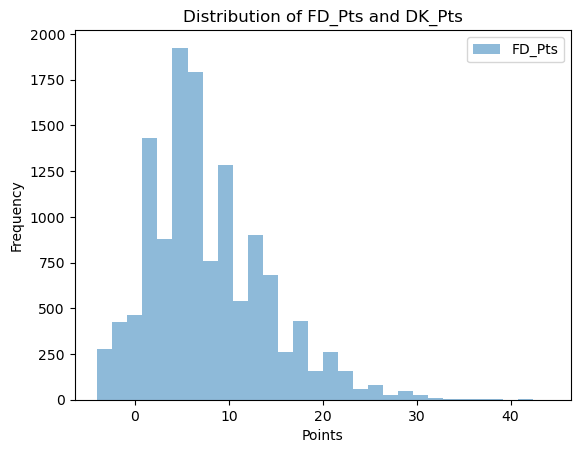

In [430]:
# Plot FD_Pts
plt.hist(def_target_var['FD_Pts'], bins=30, alpha=0.5, label='FD_Pts')

# Adding titles and labels
plt.title('Distribution of FD_Pts and DK_Pts')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

# Show the plot
plt.show()

In [444]:
conn = sqlite3.connect('nfl_dfs.db')

# Define the table name
table_name = 'defense_target'

# Specify data types
dtype = {
    'season': 'INTEGER',
    'week': 'INTEGER',
    'game_id': 'TEXT',
    'defteam': 'TEXT',
    'FD_Pts': 'REAL',
    'DK_Pts': 'REAL'
}

# Write the dataframe to the SQLite table
def_target_var.to_sql(table_name, conn, if_exists='replace', index=False, dtype=dtype)

# Confirm that the data has been written
print(f"Data written to table {table_name} in SQLite database nfl_fantasy.db")

# Close the connection
conn.close()

Data written to table defense_target in SQLite database nfl_fantasy.db


In [445]:
# Connect to SQLite database
conn = sqlite3.connect('nfl_dfs.db')

# Create a cursor object
cursor = conn.cursor()

# Execute a query to get the list of tables
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

# Fetch all results
tables = cursor.fetchall()

# Print the list of tables
print("Tables in the database:")
for table in tables:
    print(table[0])

# Close the connection
conn.close()

Tables in the database:
team_defense
defense_target
